In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras import  datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 22s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

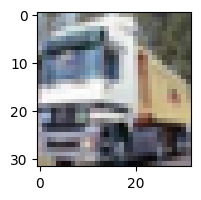

In [9]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[1])

In [11]:
print(y_train[1])

[9]


In [12]:
y_train_flat = y_train.reshape(-1,)
y_train_flat[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
label_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
def show_image(X, y, idx):
    plt.figure(figsize=(10, 2))
    plt.imshow(X[idx])
    plt.xlabel(label_names[y_train_flat[idx]])

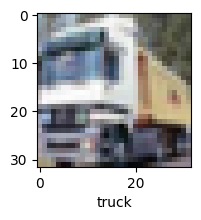

In [16]:
show_image(X_train, y_train, 1)

In [17]:
X_train = X_train / 255 #Normalized the dataset
X_test = X_test / 255

In [29]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [30]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train_flat, epochs=4)

Epoch 1/4
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8106 - accuracy: 0.3552
Epoch 2/4
1563/1563 [==============================] - 158s 101ms/step - loss: 1.6205 - accuracy: 0.4269
Epoch 3/4
1563/1563 [==============================] - 161s 103ms/step - loss: 1.5402 - accuracy: 0.4564
Epoch 4/4
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4785 - accuracy: 0.4788


In [32]:
y_test_flat = y_test.reshape(-1,)
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 1.5401 - accuracy: 0.4562


[1.5400551557540894, 0.4562000036239624]

In [64]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 3),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 3),
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [65]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(X_train, y_train_flat, epochs=4)

Epoch 1/4
1563/1563 [==============================] - 163s 104ms/step - loss: 1.4384 - accuracy: 0.4775
Epoch 2/4
1563/1563 [==============================] - 209s 134ms/step - loss: 1.1067 - accuracy: 0.6081
Epoch 3/4
1563/1563 [==============================] - 203s 130ms/step - loss: 0.9280 - accuracy: 0.6716
Epoch 4/4
1563/1563 [==============================] - 384s 246ms/step - loss: 0.7822 - accuracy: 0.7212


In [67]:
y_predict = model.predict(X_test)

313/313 [==============================] - 6s 18ms/step


In [69]:
y_predict_array = [np.argmax(i) for i in y_predict]
y_predict_array[:5]

[3, 8, 8, 8, 6]

In [70]:
y_test_flat[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [71]:
y_predict = model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9281 - accuracy: 0.6776


In [75]:
print(classification_report(y_test_flat, y_predict_array))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.75      0.85      0.79      1000
           2       0.57      0.55      0.56      1000
           3       0.56      0.39      0.46      1000
           4       0.57      0.67      0.61      1000
           5       0.65      0.52      0.58      1000
           6       0.64      0.83      0.73      1000
           7       0.71      0.75      0.73      1000
           8       0.74      0.83      0.78      1000
           9       0.81      0.69      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

